In [1]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("bghira/free-to-use-pixelart")

/Users/harry.sadler/Library/Caches/pypoetry/virtualenvs/pixelart-dataset-exploration-iWfMpuw5-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 7273/7273 [00:00<00:00, 191449.45 examples/s]


In [3]:
train = ds['train']
df = pd.DataFrame(train)
df.head(3)

,subset,sequence,subset-sequence-element,title,description,views,filename,pixel_size,has_watermark,image_hash,image_url,full_image_url,likes_count,comments_count,width,height,date_created,content_warning,warning,liked
0,highlighted,1,highlighted.1.1,Highlander,,36,sr2e3cecf2e99aws3-1 Highlander.png,6,False,sr2e3cecf2e99aws3,https://art.pixilart.com/thumb/sr2e3cecf2e99aw...,https://art.pixilart.com/sr2e3cecf2e99aws3.png,9,0,200,250,05/25/2024,None,False,False
1,highlighted,1,highlighted.1.2,Dungeon Key,#challenge,166,sr26fa2adb2a6aws3-2 Dungeon Key.png,14,False,sr26fa2adb2a6aws3,https://art.pixilart.com/thumb/sr26fa2adb2a6aw...,https://art.pixilart.com/sr26fa2adb2a6aws3.gif,49,2,54,100,05/25/2024,None,False,False
2,highlighted,1,highlighted.1.3,Mecha1old,Old mecha i did back in 2022,117,sr20b7ff421b0aws3-3 Mecha1old.png,11,False,sr20b7ff421b0aws3,https://art.pixilart.com/thumb/sr20b7ff421b0aw...,https://art.pixilart.com/sr20b7ff421b0aws3.gif,39,0,128,128,05/25/2024,None,False,False


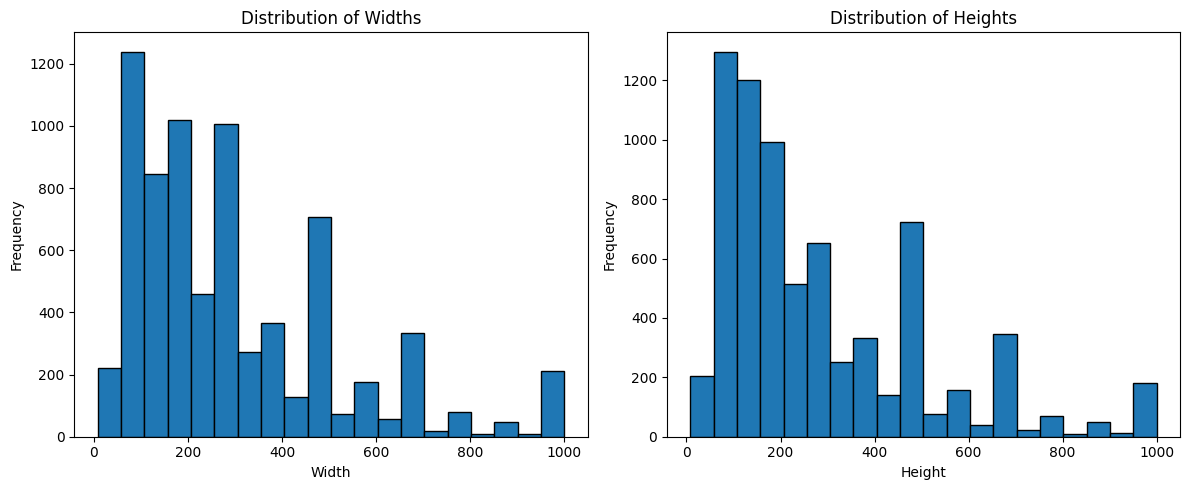

In [4]:
import matplotlib.pyplot as plt

# Assuming 'width' and 'height' are columns in your DataFrame 'df'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['width'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['height'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

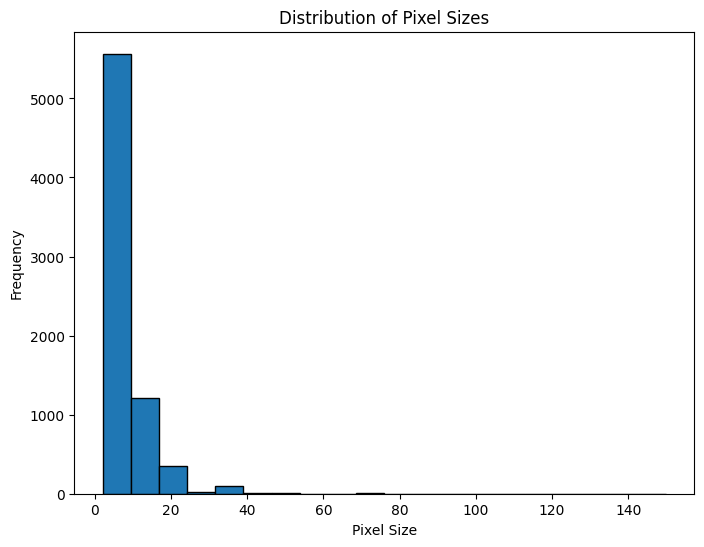

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df['pixel_size'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Pixel Sizes')
plt.xlabel('Pixel Size')
plt.ylabel('Frequency')
plt.show()

In [7]:
from PIL import Image
import requests
from io import BytesIO

def get_image_from_url(image_url):
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # Raise an exception for bad status codes
        image = Image.open(BytesIO(response.content))
        return image
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


In [9]:
from tqdm import tqdm

n_bad = 0
n_good = 0
for i, item in tqdm(df.sample(100).iterrows()):
    img_url = item["full_image_url"]
    # print(img_url)
    img = get_image_from_url(img_url)
    scaled_width = item["width"] * item["pixel_size"]
    scaled_height = item["height"] * item["pixel_size"]
    # print("scaled width: ", scaled_width)
    # print("scaled height: ", scaled_height)
    # print(img.size)
    if img.size[0] == scaled_width and img.size[1] == scaled_height:
        n_good += 1
    else:
        n_bad += 1
print()
print("n_good: ", n_good)
print("n_bad: ", n_bad)


100it [00:55,  1.80it/s]


n_good:  91
n_bad:  9


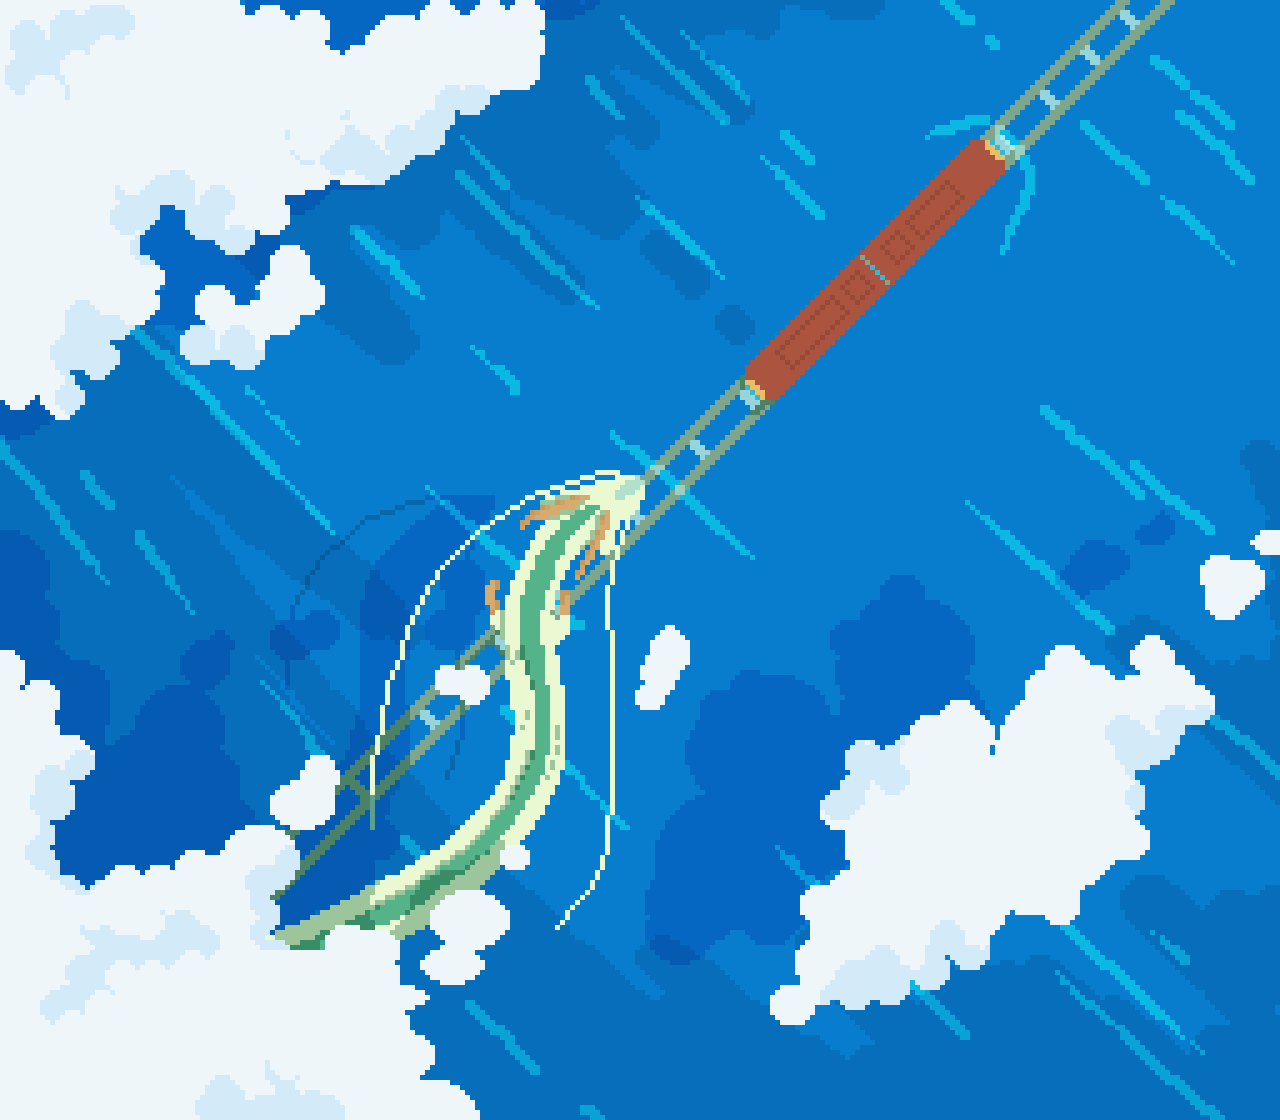

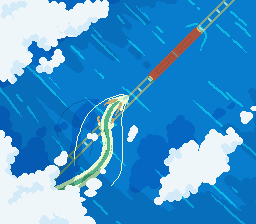

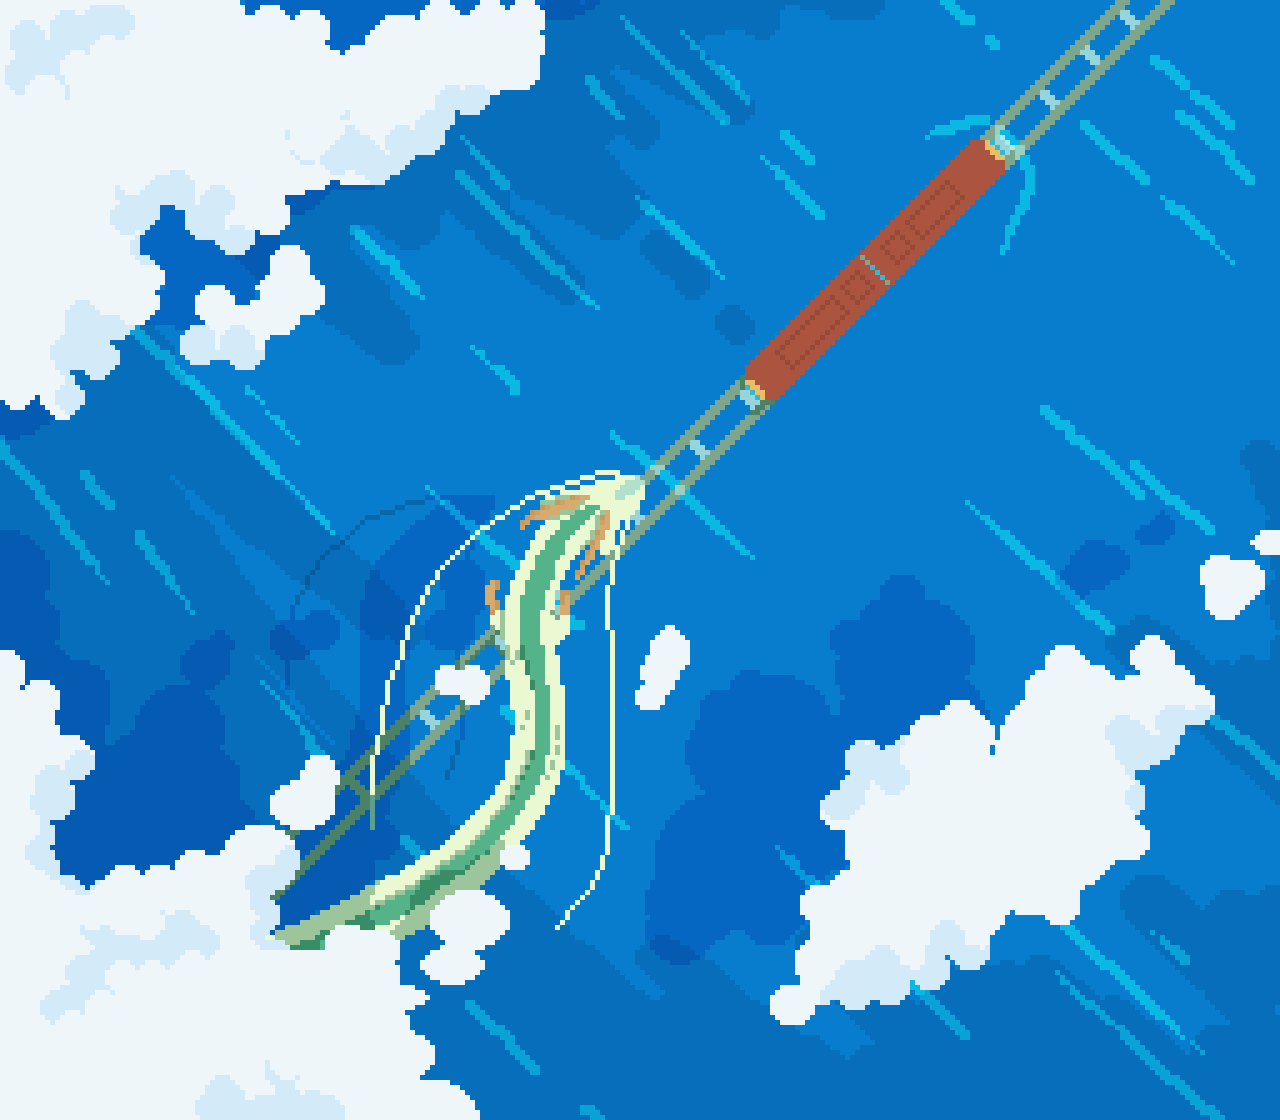

Exact match


In [16]:
# prompt: write a function to scale a PIL Image down by a factor and return a new PIL Image

from IPython.display import display
from PIL import Image
from typing import Union

def scale_image(image: Image.Image, factor: float) -> Union[Image.Image, None]:
    """Scales a PIL Image down by a factor and returns a new PIL Image.

    Args:
        image: The PIL Image to scale.
        factor: The scaling factor (e.g., 0.5 for half the size).

    Returns:
        A new PIL Image scaled down by the factor, or None if an error occurs.
    """
    try:
        width, height = image.size
        new_width = int(width * factor)
        new_height = int(height * factor)
        scaled_image = image.resize((new_width, new_height))
        return scaled_image
    except Exception as e:
        print(f"Error scaling image: {e}")
        return None

index = 98

# get image
img_url = df['full_image_url'][index]
img = get_image_from_url(img_url)
display(img)

# scale image down by pixel size
scale_factor = df['pixel_size'][index]
scaled_img = scale_image(img, 1 / scale_factor)
display(scaled_img)

# scale back up by pixel size
scaled_back_up_img = scale_image(scaled_img, scale_factor)
display(scaled_back_up_img)

# compare raw with rescaled back up for exact match, use checksums
if img.tobytes() == scaled_back_up_img.tobytes():
    print("Exact match")
else:
    print("No match")
